In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import keras
import bayesflow as bf

from numba import njit

# Settings

In [5]:
num_agents = 12
boundary_size = 10

# Priors

In [3]:
def r_prior():
    r = np.random.beta(a=2., b=5.)
    return dict(r=r)

def v_prior():
    v = np.random.beta(a=2., b=2.)
    return dict(v=v)

# Agent Initialization

In [17]:
def initialize_agents(
        num_agents=12,
        boundary_size=10.0,
):
    """
    Initialize agent positions and directions.
    
    Parameters
    ----------
    num_agents      : int, default: 12
        Number of agents to initialize. 
    boundary_size   : float, default: 10.0
        Size of the boundary (in meters).
    
    Returns
    -------
    positions      : np.ndarray of shape (num_agents, 2)
        Initial positions of the agents.
    directions      : np.ndarray of shape (num_agents, )
        Initial directions of the agents. 
    """
    positions = np.random.random(size=(num_agents, 2)).astype(np.float32) * boundary_size
    directions = np.random.random(size=num_agents).astype(np.float32) * 2 * np.pi

    return positions, directions

In [20]:
positions, directions = initialize_agents()
np.cos(directions)


array([-0.8617079 ,  0.42061913, -0.8374381 , -0.6778944 , -0.1251095 ,
       -0.21365082, -0.9965513 , -0.21216832, -0.41049558,  0.66310114,
        0.7954716 ,  0.34798738], dtype=float32)

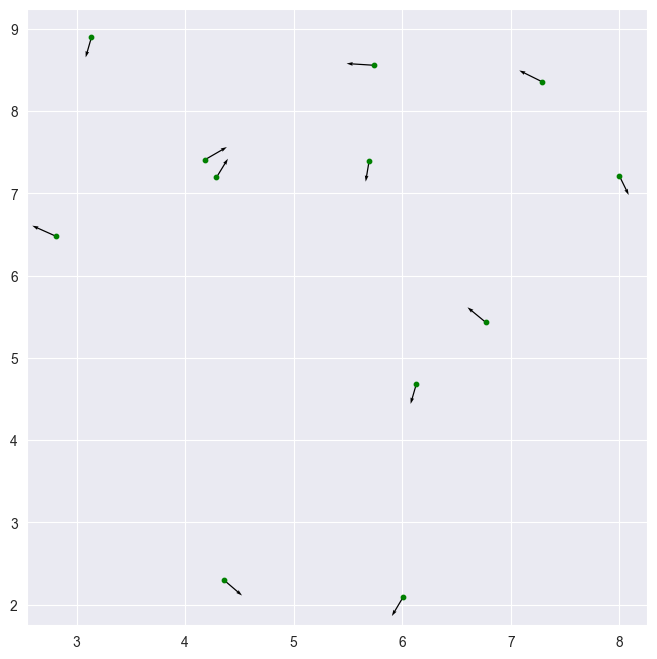

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.quiver(positions[:, 0], positions[:, 1], np.cos(directions), np.sin(directions), angles='xy', scale_units="xy", scale=4, width=0.002)
ax.scatter(positions[:, 0], positions[:, 1], c='g', s=10)

# Forward Model

In [42]:
def vicsek_model(
        sensing_radius = 2.,
        velocity = 1.,
        num_agents=12,
        boundary_size=10,
        num_timesteps=1000,
):
    
    # Initialize positions and directions for each agent
    positions = np.zeros((num_timesteps + 1, num_agents, 2))
    directions = np.zeros((num_timesteps + 1, num_agents, 1))
    
    initial_positions, initial_directions = initialize_agents(num_agents, boundary_size)
    positions[0] = initial_positions.copy()
    directions[0] = initial_directions[:,np.newaxis].copy()
    
    # Loop over each timestep
    for t in range(num_timesteps):
        # For each timestep, initialize directions for the agents
        new_directions = np.zeros(num_agents)
        
        # For each agent, collect neighbors within its sensing range
        for i in range(num_agents):
            
    
    return positions, directions

In [43]:
positions, directions = vicsek_model()
positions

array([[[6.47449732, 4.24953508],
        [2.99235082, 5.0029211 ],
        [5.1310339 , 2.7837801 ],
        ...,
        [3.2009263 , 0.40078384],
        [3.88660431, 0.70317215],
        [9.29216766, 3.96509433]],

       [[0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        ...,
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       [[0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        ...,
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       ...,

       [[0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        ...,
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       [[0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        .